# <h1 style="font-family: 'poppins'; font-weight: bold; color: red;text-align:center; text-transform:uppercase:background:black">Author : Anees ur rehman</h1>

# Title: Heart Disease Prediction

## Meta-Data (About Dataset)
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type 
  1. typical angina, 
  2. atypical angina, 
  3. non-anginal, 
  4. asymptomatic
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* -- `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute

### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310. 
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

**They would be:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## <h1 style="text-transform:uppercase; background: white ; color : black ">Import Libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

## <h1 style="text-transform:uppercase; background: white ; color : black ;text-align:center">Date pre-processing (EDA)</h1>

In [2]:
# Load the dataset
data = pd.read_csv("heart_disease_uci.csv")

In [3]:
data.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [4]:
# Basic information about the dataset
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
# Checking for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [6]:
# Checking for duplicate rows
print("\nNumber of duplicate rows:", data.duplicated().sum())


Number of duplicate rows: 0


## <h1 style="background:white;color:black;text-align:center;text-tranfrom:uppercase">Feature Normalization</h1>


In [7]:
print("\nNormalizing numerical features:")
numerical_features = data.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])


Normalizing numerical features:


In [25]:
# Display the first few rows after normalization
print("\nFirst ten rows after normalization:")
display(data.head(10))



First ten rows after normalization:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
304,0.330794,0.020408,1.0,0.333333,0.333333,0.600,0.402985,0.0,0.333333,0.704225,0.0,0.295455,1.0,0.225458,1.0,0
305,0.331882,0.020408,1.0,0.333333,0.333333,0.700,0.330233,0.0,0.333333,0.774648,0.0,0.295455,1.0,0.225458,1.0,0
309,0.336235,0.081633,1.0,0.333333,0.333333,0.550,0.373134,0.0,0.333333,0.873239,0.0,0.295455,1.0,0.225458,1.0,0
310,0.337323,0.081633,1.0,0.333333,0.333333,0.625,0.421227,0.0,0.333333,0.669014,0.0,0.295455,1.0,0.225458,1.0,0
311,0.338411,0.102041,1.0,0.333333,0.666667,0.600,0.494196,0.0,0.333333,0.880282,0.0,0.295455,1.0,0.225458,1.0,0
314,0.341676,0.122449,1.0,0.333333,0.333333,0.490,0.364842,0.0,0.333333,0.633803,0.0,0.295455,1.0,0.225458,1.0,0
318,0.346028,0.142857,1.0,0.333333,0.333333,0.750,0.437811,0.0,0.333333,0.760563,0.0,0.295455,1.0,0.225458,1.0,0
319,0.347116,0.163265,1.0,0.333333,0.333333,0.600,0.275290,0.0,0.333333,0.845070,0.0,0.295455,1.0,0.225458,1.0,0
321,0.349293,0.163265,1.0,0.333333,0.666667,0.650,0.346600,0.0,0.333333,0.830986,0.0,0.295455,1.0,0.225458,1.0,0
322,0.350381,0.163265,1.0,0.333333,0.666667,0.750,0.265340,0.0,0.333333,0.788732,0.0,0.295455,1.0,0.225458,1.0,0


In [9]:
categorical_features = data.select_dtypes(include=['object', 'category']).columns

# Encoding categorical features using LabelEncoder
print("\nEncoding and normalizing categorical features:")
encoder = LabelEncoder()

for col in categorical_features:
    data[col] = encoder.fit_transform(data[col])

# Normalize the encoded categorical features
data[categorical_features] = scaler.fit_transform(data[categorical_features])

# Display the first few rows after normalization
print("\nFirst five rows after normalizing categorical features:")
display(data.head())


Encoding and normalizing categorical features:

First five rows after normalizing categorical features:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,0.000000,0.714286,1.0,0.0,1.000000,0.725,0.386401,0.5,0.000000,0.633803,0.0,0.556818,0.000000,0.000000,0.000000,0.00
1,0.001088,0.795918,1.0,0.0,0.000000,0.800,0.474295,0.0,0.000000,0.338028,0.5,0.465909,0.333333,1.000000,0.333333,0.50
2,0.002176,0.795918,1.0,0.0,0.000000,0.600,0.379768,0.0,0.000000,0.485915,0.5,0.590909,0.333333,0.666667,0.666667,0.25
3,0.003264,0.183673,1.0,0.0,0.666667,0.650,0.414594,0.0,0.333333,0.894366,0.0,0.693182,0.000000,0.000000,0.333333,0.00
4,0.004353,0.265306,0.0,0.0,0.333333,0.650,0.338308,0.0,0.000000,0.788732,0.0,0.454545,0.666667,0.000000,0.333333,0.00


## <h1 style="background:white;color:black;text-align:center;text-transform:uppercase">Handling Missing values</h1>

In [10]:
# Handling missing values for numerical columns
print("\nHandling missing values for numerical columns:")
numerical_features = data.select_dtypes(include=[np.number]).columns
num_imputer = SimpleImputer(strategy='mean')
data[numerical_features] = num_imputer.fit_transform(data[numerical_features])


Handling missing values for numerical columns:


In [11]:
print(data.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


## <h1 style="background:white;color:black;text-align:center;text-transform:uppercase">Handling Outliers</h1>


Visualizing outliers in numerical columns:


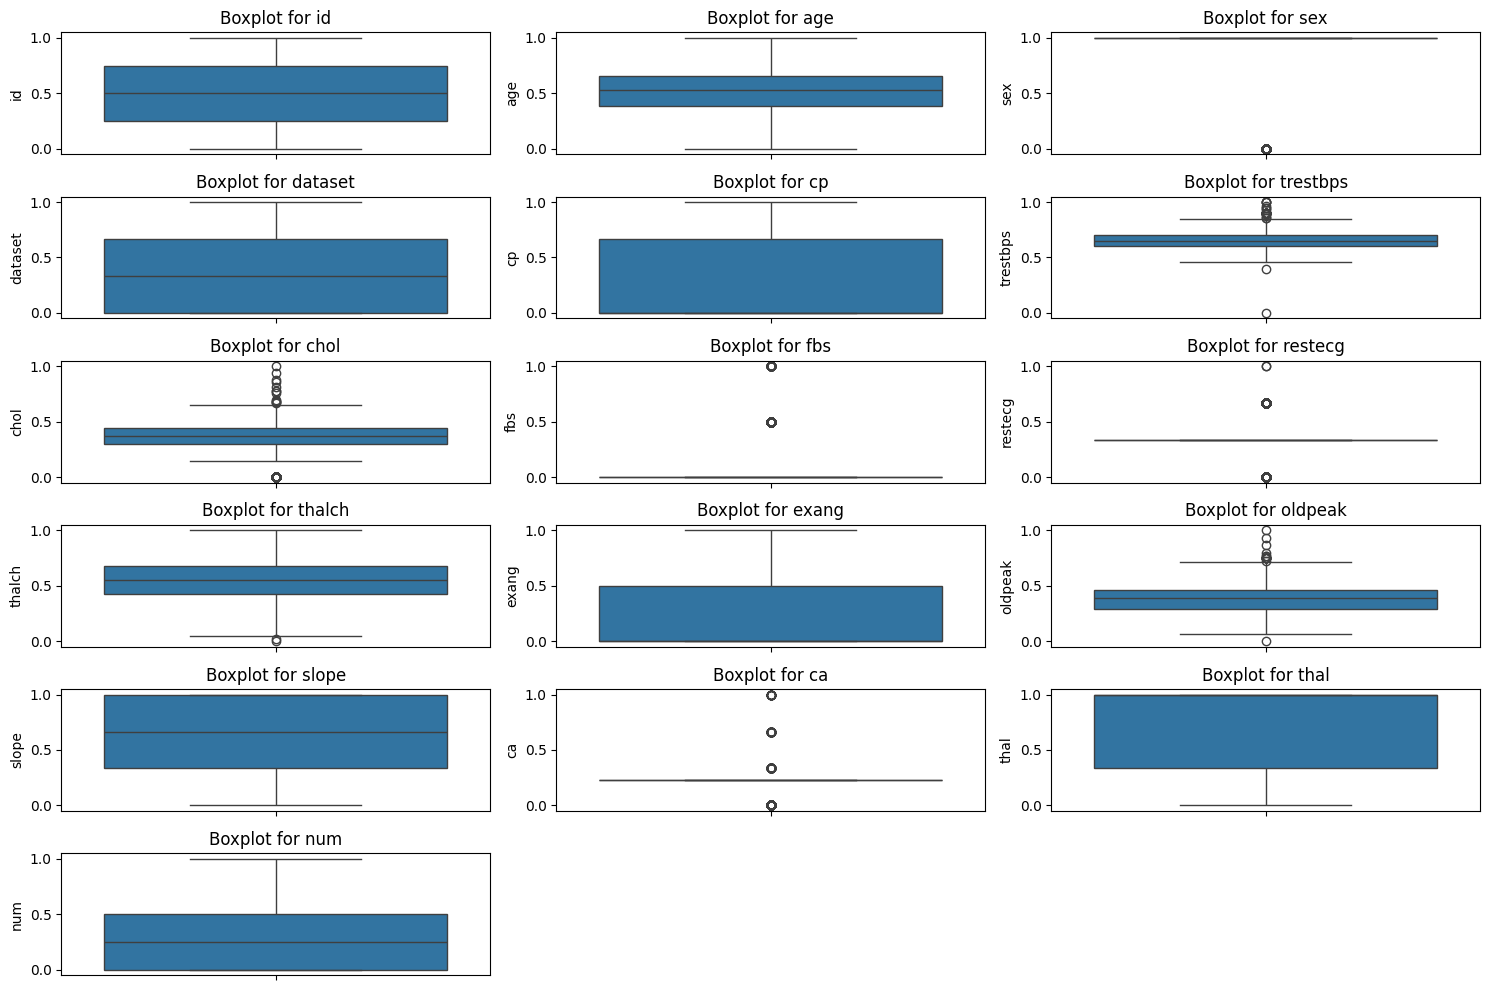

In [12]:
print("\nVisualizing outliers in numerical columns:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(len(numerical_features) // 3 + 1, 3, i + 1)
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()

In [13]:
# Removing outliers using the IQR method
print("\nRemoving outliers:")
for col in numerical_features:
    try:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    except TypeError:
        print(f"Skipping column {col} due to incompatible data types.")



Removing outliers:



Visualizing outliers in numerical columns:


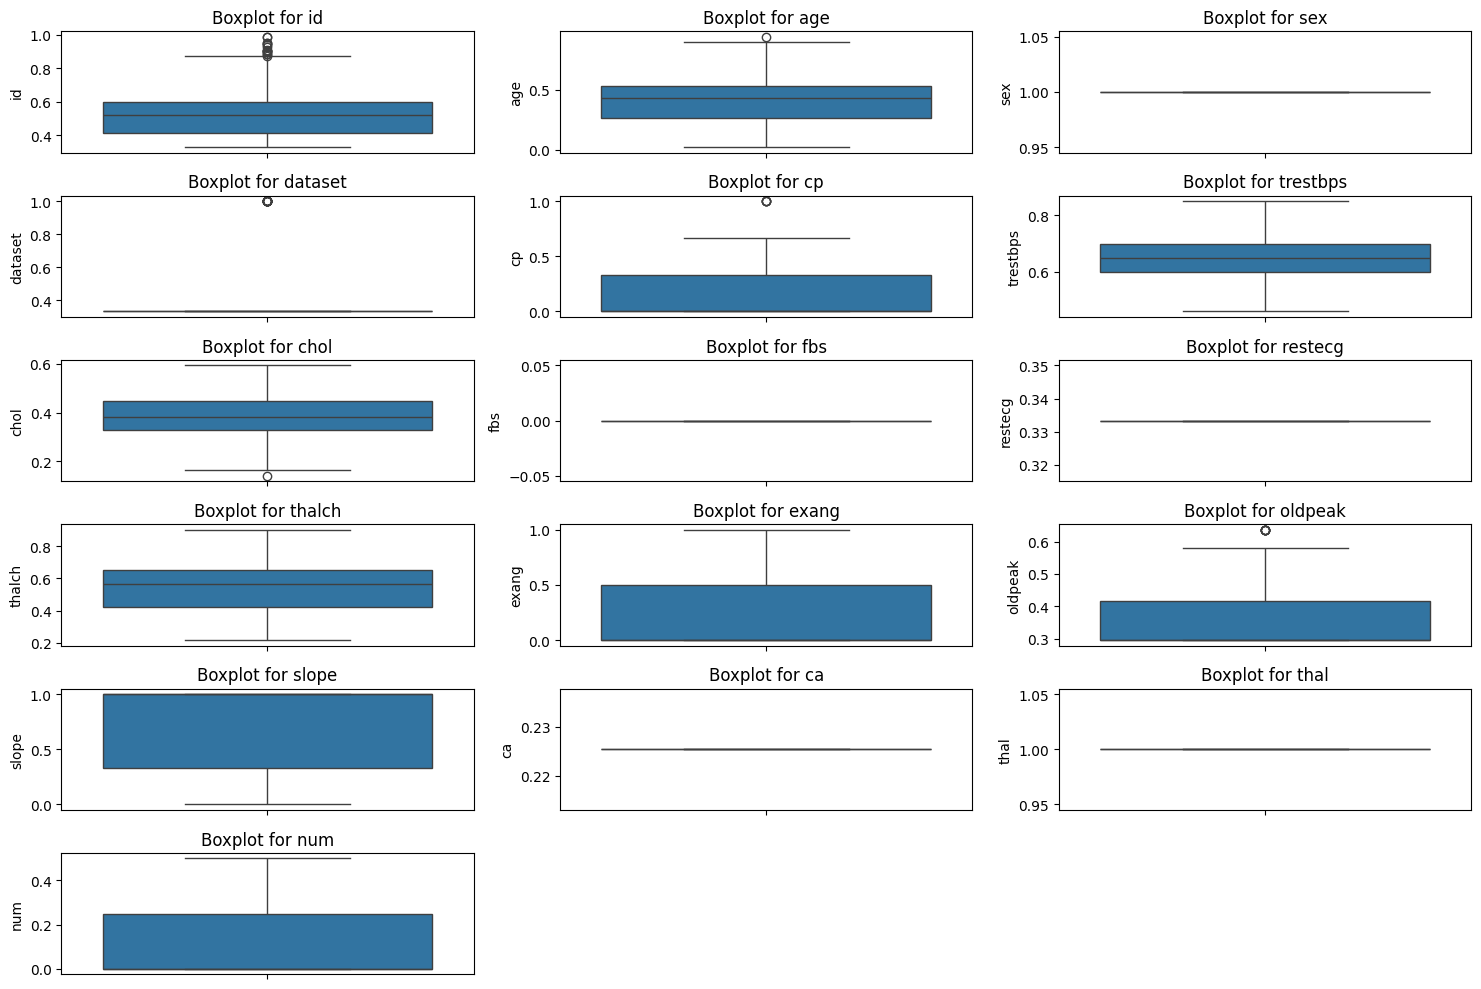

In [14]:
print("\nVisualizing outliers in numerical columns:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(len(numerical_features) // 3 + 1, 3, i + 1)
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()

In [15]:
print("\nRemoving outliers from categorical columns:")
for col in categorical_features:
    value_counts = data[col].value_counts()
    rare_categories = value_counts[value_counts < (0.01 * len(data))].index
    data = data[~data[col].isin(rare_categories)]


Removing outliers from categorical columns:



Visualizing outliers in numerical columns:


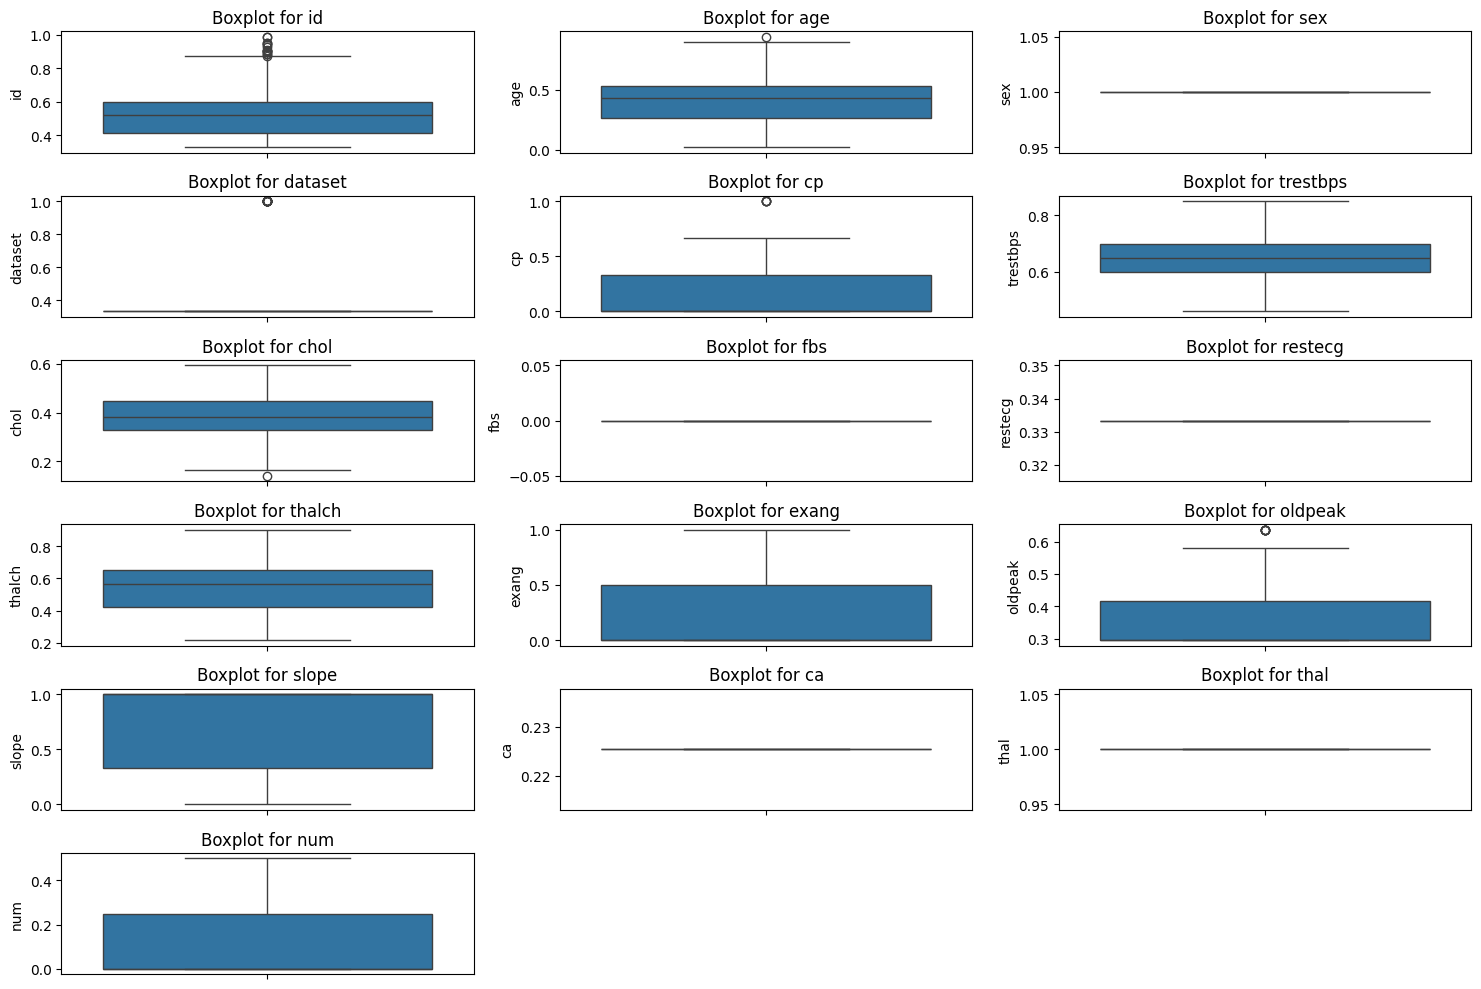

In [16]:
print("\nVisualizing outliers in numerical columns:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(len(numerical_features) // 3 + 1, 3, i + 1)
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()

## <h1 style="background:BLACK;color:red;">MACHILE LEARNING</h1>

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 304 to 908
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        156 non-null    float64
 1   age       156 non-null    float64
 2   sex       156 non-null    float64
 3   dataset   156 non-null    float64
 4   cp        156 non-null    float64
 5   trestbps  156 non-null    float64
 6   chol      156 non-null    float64
 7   fbs       156 non-null    float64
 8   restecg   156 non-null    float64
 9   thalch    156 non-null    float64
 10  exang     156 non-null    float64
 11  oldpeak   156 non-null    float64
 12  slope     156 non-null    float64
 13  ca        156 non-null    float64
 14  thal      156 non-null    float64
 15  num       156 non-null    float64
dtypes: float64(16)
memory usage: 20.7 KB


In [18]:
if data['num'].nunique() > 2:
    data['num'] = (data['num'] > 0).astype(int) 


In [24]:
# Define features and target variable
X = data.drop('num', axis=1)  
y = data['num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

# Initialize models
models = {
   
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes':GaussianNB()
}

# Store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results[model_name] = (accuracy*100, recall, f1)

# Display results
for model, metrics in results.items():
    print(f"1-{model}\n Accuracy: {metrics[0]:.2f}  | Recall: {metrics[1]:.2f}  | F1 Score: {metrics[2]:.2f}\n")

1-Decision Tree
 Accuracy: 97.87  | Recall: 0.96  | F1 Score: 0.98

1-KNN
 Accuracy: 80.85  | Recall: 0.74  | F1 Score: 0.79

1-Naive Bayes
 Accuracy: 87.23  | Recall: 0.78  | F1 Score: 0.86

